# Data Quality Report (DQR)
### Vítor Moura - Data Scientist

* DQR is an analytical report with the objective of understanding the organization of the data, if they are coherent and if they are consistent. 
* Making it possible to identify problems and fix them, find anomalies and summarize data based on the business problem.

In [1]:
#!pip install -q -U watermark
!pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
%reload_ext watermark
%watermark -a "Vítor Moura" --iversions

Author: Vítor Moura

matplotlib: 3.5.2
pandas    : 1.4.4
numpy     : 1.21.5
seaborn   : 0.11.2



In [4]:
df_unique = pd.read_csv('data/individuos_espec.csv', sep = ';')
df_connections = pd.read_csv('data/conexoes_espec.csv', sep=';')

### Data Shape

In [5]:

df_unique.shape

(1000000, 9)

In [6]:

df_connections.shape

(999999, 5)

### Data Visualization

In [7]:
df_unique.head()

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668


In [8]:
df_connections.head()

,V1,V2,grau,proximidade,prob_V1_V2
0,1,2,trabalho,visita_frequente,0.589462
1,1,3,trabalho,visita_rara,0.708465
2,2,4,trabalho,visita_casual,NaN
3,2,5,trabalho,visita_rara,0.638842
4,3,6,amigos,mora_junto,NaN


### Data Summarize

In [9]:
print("Row: ", df_unique.shape[0])
print("Columns: ", df_unique.shape[1])
print("\nVariables: ", df_unique.columns.tolist())
print("\nNull Values: \n", df_unique.isnull().sum())
print("\nUnique Values: \n", df_unique.nunique())

Row:  1000000
Columns:  9

Variables:  ['name', 'idade', 'estado_civil', 'qt_filhos', 'estuda', 'trabalha', 'pratica_esportes', 'transporte_mais_utilizado', 'IMC']

Null Values: 
 name                              0
idade                         95937
estado_civil                  50073
qt_filhos                     28867
estuda                        40130
trabalha                       6353
pratica_esportes             149124
transporte_mais_utilizado     43033
IMC                          113870
dtype: int64

Unique Values: 
 name                         1000000
idade                            105
estado_civil                       4
qt_filhos                         10
estuda                             2
trabalha                           2
pratica_esportes                   2
transporte_mais_utilizado          3
IMC                           886130
dtype: int64


In [10]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   name                       1000000 non-null  int64  
 1   idade                      904063 non-null   float64
 2   estado_civil               949927 non-null   object 
 3   qt_filhos                  971133 non-null   float64
 4   estuda                     959870 non-null   float64
 5   trabalha                   993647 non-null   float64
 6   pratica_esportes           850876 non-null   float64
 7   transporte_mais_utilizado  956967 non-null   object 
 8   IMC                        886130 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 68.7+ MB


In [11]:
num_col1 = ['idade', 'qt_filhos', 'IMC']

cat_col1 = ['name','estado_civil', 'estuda', 'trabalha', 'pratica_esportes', 'transporte_mais_utilizado']

In [12]:
len(num_col1) + len(cat_col1) == df_unique.shape[1]

True

In [13]:
df_num1 = df_unique[num_col1]
df_cat1 = df_unique[cat_col1]

In [14]:
summary_num = pd.DataFrame(index = df_num1.columns)
summary_num['Tipo de Dado '] = df_num1.dtypes.values
summary_num['# Registros Não Nulos'] = df_num1.count().values
summary_num['# Registros Não Zeros'] = df_num1.astype(bool).sum(axis = 0)
summary_num['% Populado'] = round(summary_num['# Registros Não Nulos'] / df_num1.shape[0] * 100, 2)
summary_num['# Valores Únicos'] = df_num1.nunique().values
summary_num['Mean'] = df_num1.mean().values
summary_num['Std'] = df_num1.std().values
summary_num['Min'] = df_num1.min().values
summary_num['Max'] = df_num1.max().values
summary_num

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zeros,% Populado,# Valores Únicos,Mean,Std,Min,Max
idade,float64,904063,999997,90.41,105,30.008431,10.951566,0.000000,124.000000
qt_filhos,float64,971133,598599,97.11,10,0.928406,0.997289,0.000000,9.000000
IMC,float64,886130,1000000,88.61,886130,22.472079,7.073692,4.852828,89.158204


In [15]:
summary_cat = pd.DataFrame(index = df_cat1.columns)
summary_cat['Tipo de Dado '] = df_cat1.dtypes.values
summary_cat['# Registros Não Nulos'] = df_cat1.count().values
summary_cat['% Populado'] = round(summary_cat['# Registros Não Nulos'] / df_cat1.shape[0] * 100, 2)
summary_cat['# Valores Únicos'] = df_cat1.nunique().values

summary_cat

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos
name,int64,1000000,100.00,1000000
estado_civil,object,949927,94.99,4
estuda,float64,959870,95.99,2
trabalha,float64,993647,99.36,2
pratica_esportes,float64,850876,85.09,2
transporte_mais_utilizado,object,956967,95.70,3


In [16]:
col = []
for i in cat_col1:
    col.append(df_cat1[i].value_counts().idxmax())
summary_cat['Mais Comum'] = col
summary_cat

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Mais Comum
name,int64,1000000,100.00,1000000,1
estado_civil,object,949927,94.99,4,solteiro
estuda,float64,959870,95.99,2,0.0
trabalha,float64,993647,99.36,2,1.0
pratica_esportes,float64,850876,85.09,2,1.0
transporte_mais_utilizado,object,956967,95.70,3,publico


In [17]:
print("Linhas: ", df_connections.shape[0])
print("Colunas: ", df_connections.shape[1])
print("\nVariáveis: ", df_connections.columns.tolist())
print("\nValores Ausentes: \n", df_connections.isnull().sum())
print("\nValores Únicos: \n", df_connections.nunique())

Linhas:  999999
Colunas:  5

Variáveis:  ['V1', 'V2', 'grau', 'proximidade', 'prob_V1_V2']

Valores Ausentes: 
 V1                  0
V2                  0
grau                0
proximidade         0
prob_V1_V2     500000
dtype: int64

Valores Únicos: 
 V1             500000
V2             999999
grau                3
proximidade         4
prob_V1_V2     499999
dtype: int64


In [18]:
df_connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           999999 non-null  int64  
 1   V2           999999 non-null  int64  
 2   grau         999999 non-null  object 
 3   proximidade  999999 non-null  object 
 4   prob_V1_V2   499999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 38.1+ MB


In [19]:
num_col2 = ['prob_V1_V2']

cat_col2 = ['V1', 'V2','grau', 'proximidade']

In [20]:
len(num_col2) + len(cat_col2) == df_connections.shape[1]

True

In [21]:
df_num2 = df_connections[num_col2]
df_cat2 = df_connections[cat_col2]

In [22]:
summary_num2 = pd.DataFrame(index = df_num2.columns)
summary_num2['Tipo de Dado '] = df_num2.dtypes.values
summary_num2['# Registros Não Nulos'] = df_num2.count().values
summary_num2['# Registros Não Zeros'] = df_num2.astype(bool).sum(axis = 0)
summary_num2['% Populado'] = round(summary_num2['# Registros Não Nulos'] / df_num2.shape[0] * 100, 2)
summary_num2['# Valores Únicos'] = df_num2.nunique().values
summary_num2['Mean'] = df_num2.mean().values
summary_num2['Std'] = df_num2.std().values
summary_num2['Min'] = df_num2.min().values
summary_num2['Max'] = df_num2.max().values
summary_num2

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zeros,% Populado,# Valores Únicos,Mean,Std,Min,Max
prob_V1_V2,float64,499999,999999,50.0,499999,0.485162,0.173963,0.074462,0.942245


In [23]:
summary_cat2 = pd.DataFrame(index = df_cat2.columns)
summary_cat2['Tipo de Dado '] = df_cat2.dtypes.values
summary_cat2['# Registros Não Nulos'] = df_cat2.count().values
summary_cat2['% Populado'] = round(summary_cat2['# Registros Não Nulos'] / df_cat2.shape[0] * 100, 2)
summary_cat2['# Valores Únicos'] = df_cat2.nunique().values

summary_cat2

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos
V1,int64,999999,100.0,500000
V2,int64,999999,100.0,999999
grau,object,999999,100.0,3
proximidade,object,999999,100.0,4


In [24]:
col2 = []
for i in cat_col2:
    col2.append(df_cat2[i].value_counts().idxmax())
summary_cat2['Mais Comum'] = col2
summary_cat2

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Mais Comum
V1,int64,999999,100.0,500000,1
V2,int64,999999,100.0,999999,2
grau,object,999999,100.0,3,trabalho
proximidade,object,999999,100.0,4,visita_rara


In [25]:
dataset = df_unique.merge(df_connections, left_on='name', right_on='V2')
dataset

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC,V1,V2,grau,proximidade,prob_V1_V2
0,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,1,2,trabalho,visita_frequente,0.589462
1,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,1,3,trabalho,visita_rara,0.708465
2,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,2,4,trabalho,visita_casual,NaN
3,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,2,5,trabalho,visita_rara,0.638842
4,6,20.0,NaN,1.0,0.0,1.0,0.0,publico,20.412942,3,6,amigos,mora_junto,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,499998,999996,trabalho,visita_rara,NaN
999995,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,499998,999997,trabalho,visita_rara,NaN
999996,999998,30.0,divorciado,1.0,0.0,0.0,1.0,publico,NaN,499999,999998,familia,visita_casual,0.451662
999997,999999,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569,499999,999999,familia,visita_rara,0.186973


#### Nova Releitura dos dados para identificar possíveis erros gerados durante a união

In [26]:
print("Linhas: ", dataset.shape[0])
print("Colunas: ", dataset.shape[1])
print("\nVariáveis: ", dataset.columns.tolist())
print("\nValores Ausentes: \n", dataset.isnull().sum())
print("\nValores Únicos: \n", dataset.nunique())

Linhas:  999999
Colunas:  14

Variáveis:  ['name', 'idade', 'estado_civil', 'qt_filhos', 'estuda', 'trabalha', 'pratica_esportes', 'transporte_mais_utilizado', 'IMC', 'V1', 'V2', 'grau', 'proximidade', 'prob_V1_V2']

Valores Ausentes: 
 name                              0
idade                         95937
estado_civil                  50073
qt_filhos                     28867
estuda                        40130
trabalha                       6353
pratica_esportes             149124
transporte_mais_utilizado     43033
IMC                          113870
V1                                0
V2                                0
grau                              0
proximidade                       0
prob_V1_V2                   500000
dtype: int64

Valores Únicos: 
 name                         999999
idade                           105
estado_civil                      4
qt_filhos                        10
estuda                            2
trabalha                          2
pratica_esp

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999999 entries, 0 to 999998
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   name                       999999 non-null  int64  
 1   idade                      904062 non-null  float64
 2   estado_civil               949926 non-null  object 
 3   qt_filhos                  971132 non-null  float64
 4   estuda                     959869 non-null  float64
 5   trabalha                   993646 non-null  float64
 6   pratica_esportes           850875 non-null  float64
 7   transporte_mais_utilizado  956966 non-null  object 
 8   IMC                        886129 non-null  float64
 9   V1                         999999 non-null  int64  
 10  V2                         999999 non-null  int64  
 11  grau                       999999 non-null  object 
 12  proximidade                999999 non-null  object 
 13  prob_V1_V2                 49

In [28]:
num_col3 = ['prob_V1_V2','idade', 'qt_filhos', 'IMC']

cat_col3 = ['V1', 'V2','grau', 'proximidade','name','estado_civil', 'estuda', 'trabalha', 'pratica_esportes', 'transporte_mais_utilizado']

In [29]:
len(num_col3) + len(cat_col3) == dataset.shape[1]

True

In [30]:
df_num3 = dataset[num_col3]
df_cat3 = dataset[cat_col3]

In [31]:
summary_num3 = pd.DataFrame(index = df_num3.columns)
summary_num3['Tipo de Dado '] = df_num3.dtypes.values
summary_num3['# Registros Não Nulos'] = df_num3.count().values
summary_num3['# Registros Não Zeros'] = df_num3.astype(bool).sum(axis = 0)
summary_num3['% Populado'] = round(summary_num3['# Registros Não Nulos'] / df_num3.shape[0] * 100, 2)
summary_num3['# Valores Únicos'] = df_num3.nunique().values
summary_num3['Mean'] = df_num3.mean().values
summary_num3['Std'] = df_num3.std().values
summary_num3['Min'] = df_num3.min().values
summary_num3['Max'] = df_num3.max().values
summary_num3

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zeros,% Populado,# Valores Únicos,Mean,Std,Min,Max
prob_V1_V2,float64,499999,999999,50.00,499999,0.485162,0.173963,0.074462,0.942245
idade,float64,904062,999996,90.41,105,30.008415,10.951562,0.000000,124.000000
qt_filhos,float64,971132,598598,97.11,10,0.928406,0.997289,0.000000,9.000000
IMC,float64,886129,999999,88.61,886129,22.472079,7.073696,4.852828,89.158204


In [32]:
summary_cat3 = pd.DataFrame(index = df_cat3.columns)
summary_cat3['Tipo de Dado '] = df_cat3.dtypes.values
summary_cat3['# Registros Não Nulos'] = df_cat3.count().values
summary_cat3['% Populado'] = round(summary_cat3['# Registros Não Nulos'] / df_cat3.shape[0] * 100, 2)
summary_cat3['# Valores Únicos'] = df_cat3.nunique().values

summary_cat3

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos
V1,int64,999999,100.00,500000
V2,int64,999999,100.00,999999
grau,object,999999,100.00,3
proximidade,object,999999,100.00,4
name,int64,999999,100.00,999999
estado_civil,object,949926,94.99,4
estuda,float64,959869,95.99,2
trabalha,float64,993646,99.36,2
pratica_esportes,float64,850875,85.09,2
transporte_mais_utilizado,object,956966,95.70,3


In [33]:
col3= []
for i in cat_col3:
    col3.append(df_cat3[i].value_counts().idxmax())
summary_cat3['Mais Comum'] = col3
summary_cat3

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Mais Comum
V1,int64,999999,100.00,500000,1
V2,int64,999999,100.00,999999,2
grau,object,999999,100.00,3,trabalho
proximidade,object,999999,100.00,4,visita_rara
name,int64,999999,100.00,999999,2
estado_civil,object,949926,94.99,4,solteiro
estuda,float64,959869,95.99,2,0.0
trabalha,float64,993646,99.36,2,1.0
pratica_esportes,float64,850875,85.09,2,1.0
transporte_mais_utilizado,object,956966,95.70,3,publico


### Categorização do IMC

    


In [34]:
df = dataset.copy()

In [35]:
def imc(c):
    if c <= 18.5:
        return 'Abaixo do Peso'
    elif c >= 18.6 and c <= 25:
        return 'Peso Ideal'
    elif c >= 25.1 and c <= 30:
        return 'Sobrepeso'
    elif c >= 30.1 and c <= 35:
        return 'Obesidade Grau I'
    elif c >= 35.1 and c <= 39.9:
        return 'Obesidade Grau II'
    elif c >= 40:
        return 'Obesidade Grau III'
     

In [36]:
df['IMC_categorizado'] = df.apply(lambda x: imc(x['IMC']), axis=1)
df

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC,V1,V2,grau,proximidade,prob_V1_V2,IMC_categorizado
0,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,1,2,trabalho,visita_frequente,0.589462,Sobrepeso
1,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,1,3,trabalho,visita_rara,0.708465,Peso Ideal
2,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,2,4,trabalho,visita_casual,NaN,Sobrepeso
3,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,2,5,trabalho,visita_rara,0.638842,Abaixo do Peso
4,6,20.0,NaN,1.0,0.0,1.0,0.0,publico,20.412942,3,6,amigos,mora_junto,NaN,Peso Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,499998,999996,trabalho,visita_rara,NaN,Abaixo do Peso
999995,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,499998,999997,trabalho,visita_rara,NaN,Peso Ideal
999996,999998,30.0,divorciado,1.0,0.0,0.0,1.0,publico,NaN,499999,999998,familia,visita_casual,0.451662,None
999997,999999,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569,499999,999999,familia,visita_rara,0.186973,Abaixo do Peso


In [37]:
df.IMC_categorizado.isna().sum()

126818

### Visualização e exploração do novo conjunto de dados


In [38]:
df.head(10)

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC,V1,V2,grau,proximidade,prob_V1_V2,IMC_categorizado
0,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,1,2,trabalho,visita_frequente,0.589462,Sobrepeso
1,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,1,3,trabalho,visita_rara,0.708465,Peso Ideal
2,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,2,4,trabalho,visita_casual,NaN,Sobrepeso
3,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,2,5,trabalho,visita_rara,0.638842,Abaixo do Peso
4,6,20.0,NaN,1.0,0.0,1.0,0.0,publico,20.412942,3,6,amigos,mora_junto,NaN,Peso Ideal
5,7,55.0,solteiro,1.0,1.0,1.0,1.0,particular,NaN,3,7,familia,visita_casual,0.709608,None
6,8,50.0,divorciado,0.0,1.0,0.0,NaN,publico,21.445628,4,8,familia,mora_junto,NaN,Peso Ideal
7,9,42.0,divorciado,1.0,0.0,1.0,NaN,publico,40.793339,4,9,amigos,visita_casual,0.465209,Obesidade Grau III
8,10,24.0,divorciado,0.0,0.0,0.0,1.0,publico,26.866953,5,10,trabalho,visita_frequente,0.658706,Sobrepeso
9,11,21.0,solteiro,0.0,0.0,0.0,0.0,publico,24.375770,5,11,trabalho,visita_casual,NaN,Peso Ideal


<AxesSubplot:xlabel='proximidade', ylabel='prob_V1_V2'>

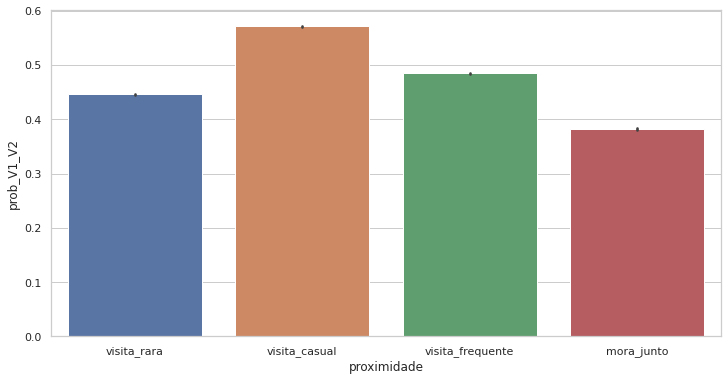

In [39]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
sns.barplot(x = 'proximidade', y = 'prob_V1_V2', data = df, order= df['proximidade'].value_counts().index)


* Compreende-se que as Visitas Casuais, apresentam maior taxa de contaminação, o que é de imaginar, considerando que não se sabe o estado de quem faz a visita

* Uma solução a ser abordada seria a restrição das Visitas Casuais, uso de vestimentas que impeçam a contaminação


<AxesSubplot:xlabel='grau', ylabel='prob_V1_V2'>

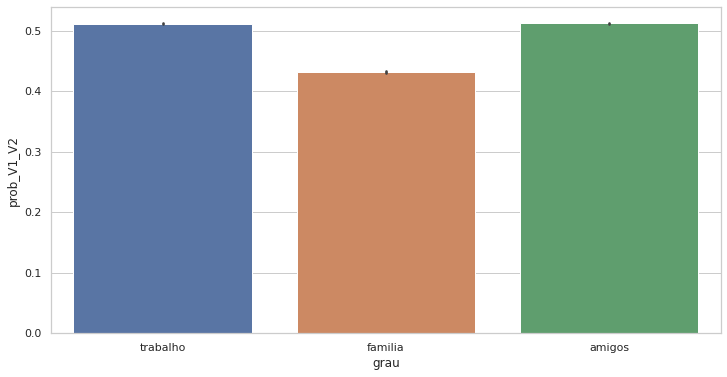

In [40]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
sns.barplot(x = 'grau', y = 'prob_V1_V2', data = df, order=df['grau'].value_counts().index)


* Observa-se que tanto Trabalho como Amigos possuem a mesma taxa de contaminação, levando em consideração que muitos do amigos também são do mesmo trabalho

* Uma proposta de solução é criar restrições de distância entre colaboradores da mesma empresa, ou disponibilizar o Home Office como maior garantia da boa saúde dos colaboradores

<AxesSubplot:xlabel='IMC_categorizado', ylabel='prob_V1_V2'>

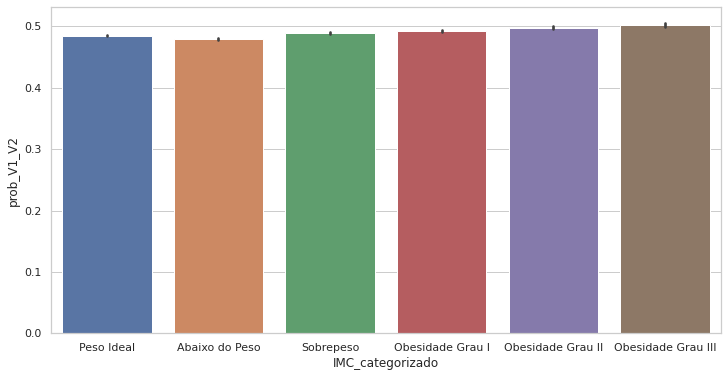

In [41]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
sns.barplot(x = 'IMC_categorizado', y = 'prob_V1_V2', data = df, order = df['IMC_categorizado'].value_counts().index)


* Levando em consideração o Gŕafico acima, pode-se observar que há uma tendência de fragilidade na saúde quando se há aumento de peso dos indivíduos, o que tenderia a uma maior taxa de contaminação para os grupos de saúde que atendem os Graus de Obsedidade 1, 2, e 3.

* Uma proposta de solução para a redução da fragilidade da saúde dos indivíduos com maior risco seria o incentivo de Práticas de Exercícios InDoor, longe de tumultos. E também o incentivo a dietas alimentares baseadas em plantas e vegetais.

<AxesSubplot:xlabel='transporte_mais_utilizado', ylabel='prob_V1_V2'>

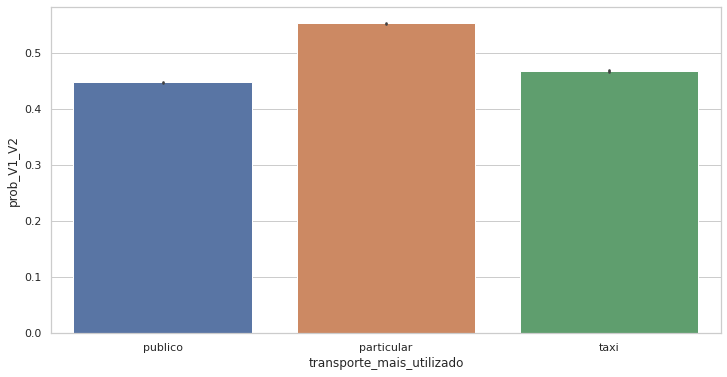

In [42]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
sns.barplot(x = 'transporte_mais_utilizado', y = 'prob_V1_V2', data = df, order= df['transporte_mais_utilizado'].value_counts().index)


* Observa-se que o Transporte com maior taxa de contaminação é o Particular. Um possível causa pode ser o descuido dos indivíduos quando acompanhados de outras pessoas no transporte por se tratar de um transporte próprio.

* Uma solução seria a  concientização dos indivíduos praticantes desse transporte para que os mesmo também se protejam da maneira mais ideal, evitando assim os surtos de contaminação